## Lecture Summary and Critical Keys
lecture 1: Data Retrieve
1. Environment Set Up: yahoo finance, package
2. Return Compute: simple, log, cumulate, total
3. Portfolio Data: std, variance, covariance, correlation

lecture 2: Moving Average
1. Compute
2. Graphing
3. Strategy (timeframe: week 5, month 24, year 242 days)

lecture 3: Momentum Strategy
1. Minute/ Daily Time Series
2. buy if last price increases (+), sell if last price decreases (-)

lecture 4: List Comprehension and Function
1. list/ tolist/ array
2. map/ filter/ lambda,
3. dictionary for nest list

lecture 5: MultiIndex DataFrames
1. Set multi index: index.year/quarter/month, unigue()/nunique(), value_count(), set_value(), sort_value(), get_level_value()
2. m
3. manipulate data: describe(), groupby([]), stack(), unstack(), index(), transponse()



lecture 6: 

---- Midterm 10/11 ----------------------------------------------------

lecture 7: 

lecture 8: 

lecture 9: 

lecture 10:

lecture 11:

lecture 12:

---- Final 12/  --------------------------------------------------------

## LECTURE 1: Portfolio Return & Risk Management

[*********************100%***********************]  5 of 5 completed


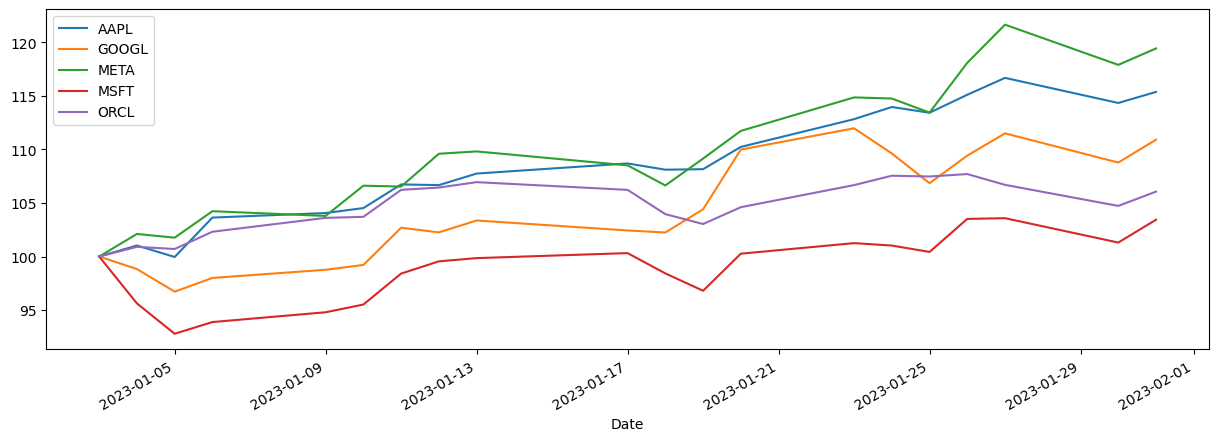

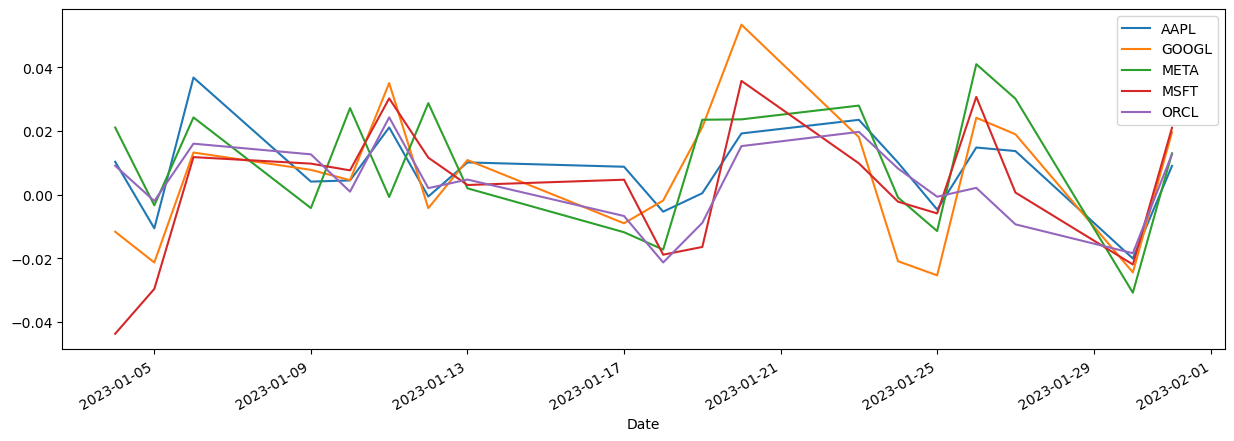

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

l1=['AAPL','GOOGL','MSFT','META','ORCL']
df2 = yf.download(l1, start="2023-01-01",end="2023-02-01")['Adj Close'] # retrive data from  01/03 -01/31, be careful about the data date
df2.to_csv('df2_l1.csv')
df2=pd.read_csv('df2_l1.csv',parse_dates=['Date'],index_col='Date')

# Data visualization: comparing price & returns
(df2/df2.iloc[0]*100).plot(figsize=(15,5)) # iloc select first row == all price on 0103
plt.show()
df2.pct_change().plot(figsize=(15,5))  # = (df2 / df2.shift(1)) - 1
plt.show()

In [6]:
# simple return
df3 = df2.pct_change()
sim_daily_return = df3.mean()
sim_annual_return  = df3.mean() * 250
sim_total_return = df3.add(1).cumprod().sub(1).iloc[-1] # iloc[-1]last row = (df2.loc['2023-01-31']-df2.loc['2023-01-03'])/df2.loc['2023-01-03']

# log return
df4 = np.log(df2 / df2.shift(1))
df4.mean()         # log_daily_return
df4.mean() * 250   # log_annual_return

# risk
df4.std()             # daily_std
df4.std() * 250 **0.5 # annual_std
df4.var()             # daily_var
df4.var() * 250       # annual_var
df4.cov()             # daily_covariance
df4.cov() * 250       # annual_covariance
df4.corr()            # daily_correlation
df4.corr()* 250       # annual_correlation

# portfolio log returns & risk
w1 = np.array([0.2,0.2,0.2,0.2,0.2])           # weight of each stock
r1 = df3.mean()* 250                           # return of each stock
np.dot(r1,w1)                                  # portfolio_daily_returns
np.dot(r1,w1)  * 250                           # portfolio_annual_returns
np.dot(w1.T, np.dot(df4.cov(), w1))            # portfolio_daily_var
np.dot(w1.T, np.dot(df4.cov()*250, w1))        # portfolio_annual_var
np.dot(w1.T, np.dot(df4.cov(), w1)) **0.5      # portfolio_daily_std 
np.dot(w1.T, np.dot(df4.cov()*250, w1)) **0.5  # portfolio_annual_std
np.sqrt(np.dot(w1.T, np.dot(df4.cov()*250, w1))) # important !!

AAPL     1.880941
GOOGL    1.362087
META     2.335702
MSFT     0.444407
ORCL     0.773882
dtype: float64

## LECTURE 2: Comparing Buy & Hold v.s moving average strategy 2
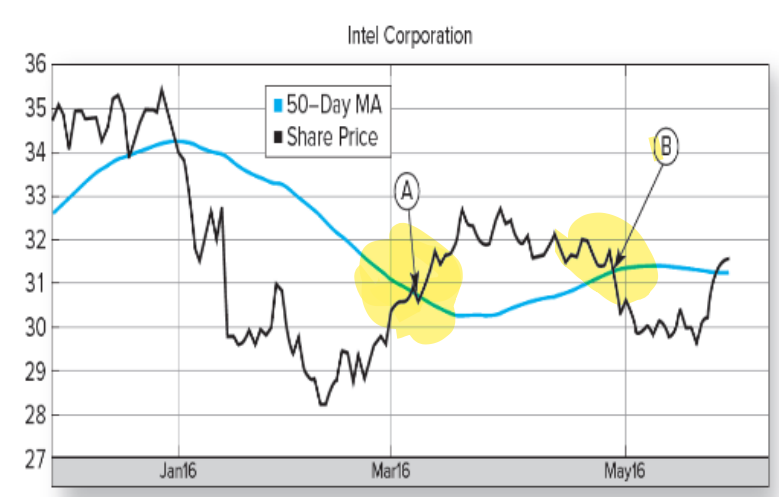

A is bullish signal, time to buy, prrice breaks through the moving
avera

B is bearish signal, time to sell, price falls below the moving averagesell 


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
#cumulative return
df1 = yf.download('AAPL', start="2010-01-01",end="2019-01-01")
df1['log return']=np.log(df1['Adj Close']/df1['Adj Close'].shift(1))
df1['log return_sum_exp']=np.exp(df1['log return'].cumsum())-1

# total return
df1.loc['2018-12-31','Adj Close']/df1.loc['2010-01-04','Adj Close']-1
df1.iloc[-1,4]/df1.iloc[0,4]-1

[*********************100%***********************]  1 of 1 completed


4.8419769277266065

[*********************100%***********************]  1 of 1 completed


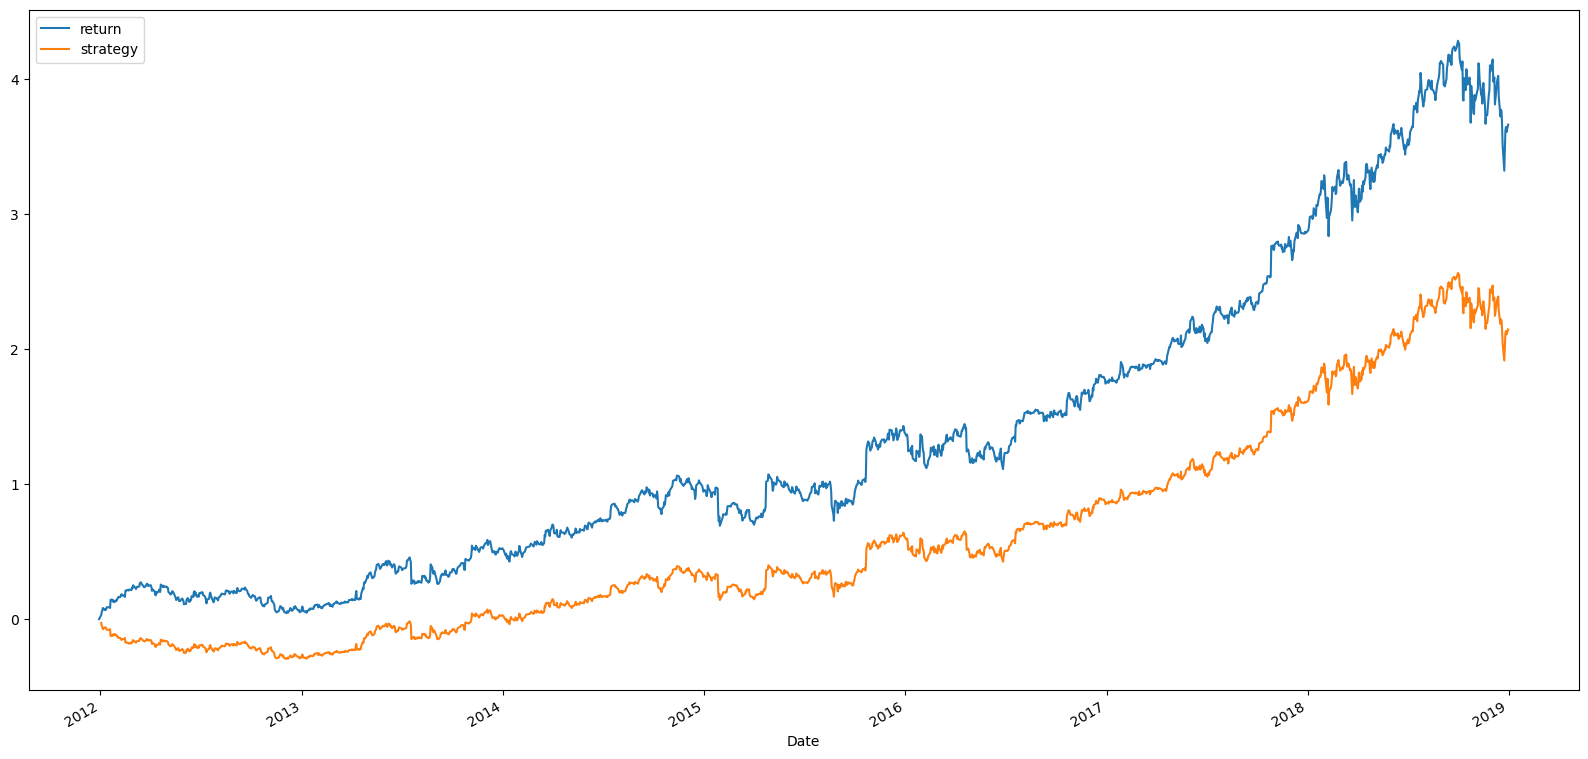

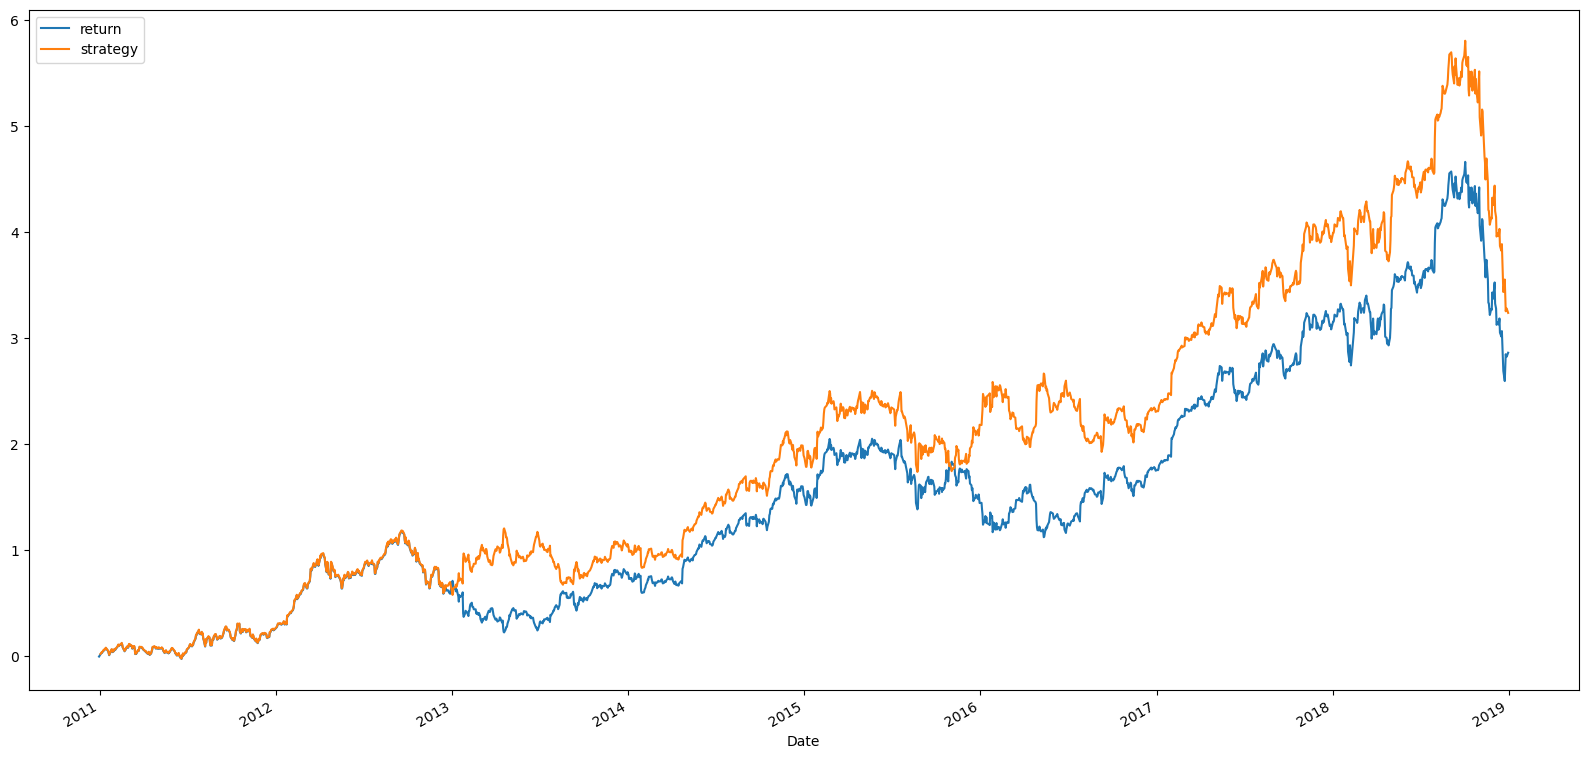

In [16]:
# 一氣呵成的函數，可帶入不同股票，分析並嘗試自動化!!!!
# way 1: using yahoo finance API
def strategy(ticker,n1,n2): # moving average strategy: if Price of n1 day > n2, buy, vice versa
    df = yf.download(ticker, start="2010-01-01",end="2019-01-01")[['Adj Close']]
    df['return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
    df['mv1'] = df['Adj Close'].rolling(n1).mean()
    df['mv2'] = df['Adj Close'].rolling(window=n2).mean()
    df.dropna(inplace=True)
    df['position'] = np.where(df['mv1'] > df['mv2'], 1 , -1)
    df['strategy'] = df['position'].shift(1) * df['return']
    df[['return','strategy']].cumsum().apply(np.exp).sub(1).plot(figsize=(20, 10))
    #df1[['Adj Close','42-day','252-day']].plot(figsize=(15, 10))
    plt.show()
strategy('MSFT',252,504)

# way 2: read data from a csv file 
def strategy_AAPL(n1,n2):
    df = pd.read_csv('df1_l2.csv',parse_dates=['Date'],index_col='Date')
    df['return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
    df['mv1'] = df['Adj Close'].rolling(n1).mean()
    df['mv2'] = df['Adj Close'].rolling(n2).mean()
    df.dropna(inplace=True)
    df['position'] = np.where(df['mv1'] > df['mv2'], 1 , -1)
    df['strategy'] = df['position'].shift(1) * df['return']
    df[['return','strategy']].cumsum().apply(np.exp).sub(1).plot(figsize=(20, 10))
    plt.show()
strategy_AAPL(42,252) # comparing price 2 month > year

## LECTURE 3: Momentum Strategies of Daily & Intraday Time
Go long on a security if the last return was positive.
 Go short when the last return was negative

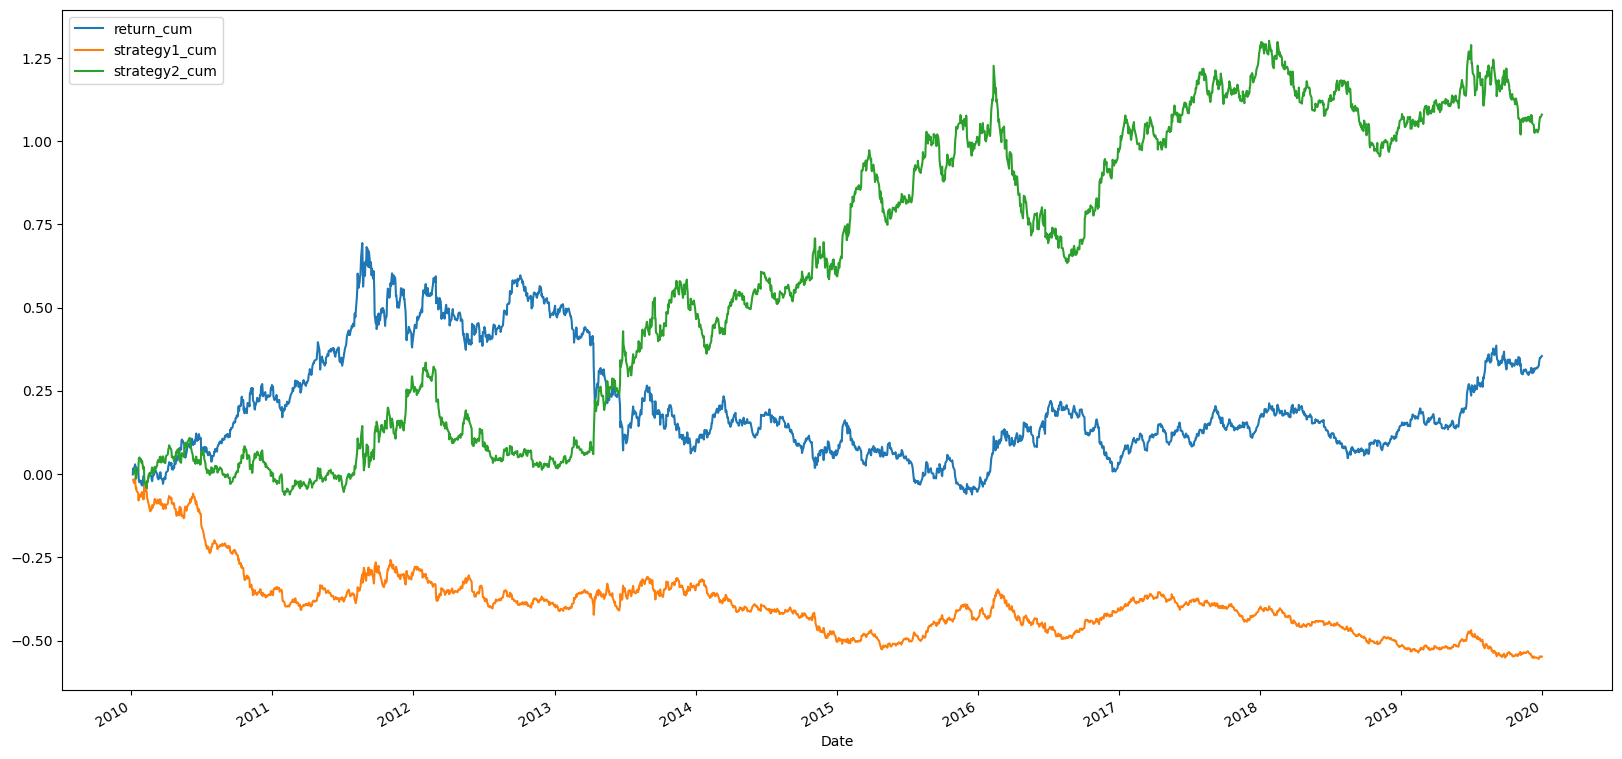

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
# 1. Daily Momentum Strategies, 1 day & 3 days 
# data retrieve
df1 = pd.read_csv('gold.csv',parse_dates=['Date'],index_col=['Date'])
df1.dropna(inplace=True)
df2 = pd.DataFrame(data={'price': df1['XAU']})
df2['return'] = np.log(df2['price'] / df2['price'].shift(1))
df2['return_cum'] = df2['return'].cumsum().apply(np.exp).sub(1)

# Momentum strategy 1 & 2
np.sign([0.5,-0.5])
df2['position1'] = np.sign(df2['return'])
df2['strategy1'] = df2['position1'].shift(1) * df2['return']
df2['strategy1_cum'] = df2['strategy1'].cumsum().apply(np.exp).sub(1)
df2['position2'] = np.sign(df2['return'].rolling(3).mean())
df2['strategy2'] = df2['position2'].shift(1) * df2['return']
df2['strategy2_cum'] = df2['strategy2'].cumsum().apply(np.exp).sub(1)

# strategy return result graph 
df2[['return_cum','strategy1_cum','strategy2_cum']].plot(figsize=(20, 10))
''' or df2[['return', 'strategy1','strategy2']].cumsum().apply(np.exp).sub(1).plot(figsize=(20, 10));'''
plt.show()

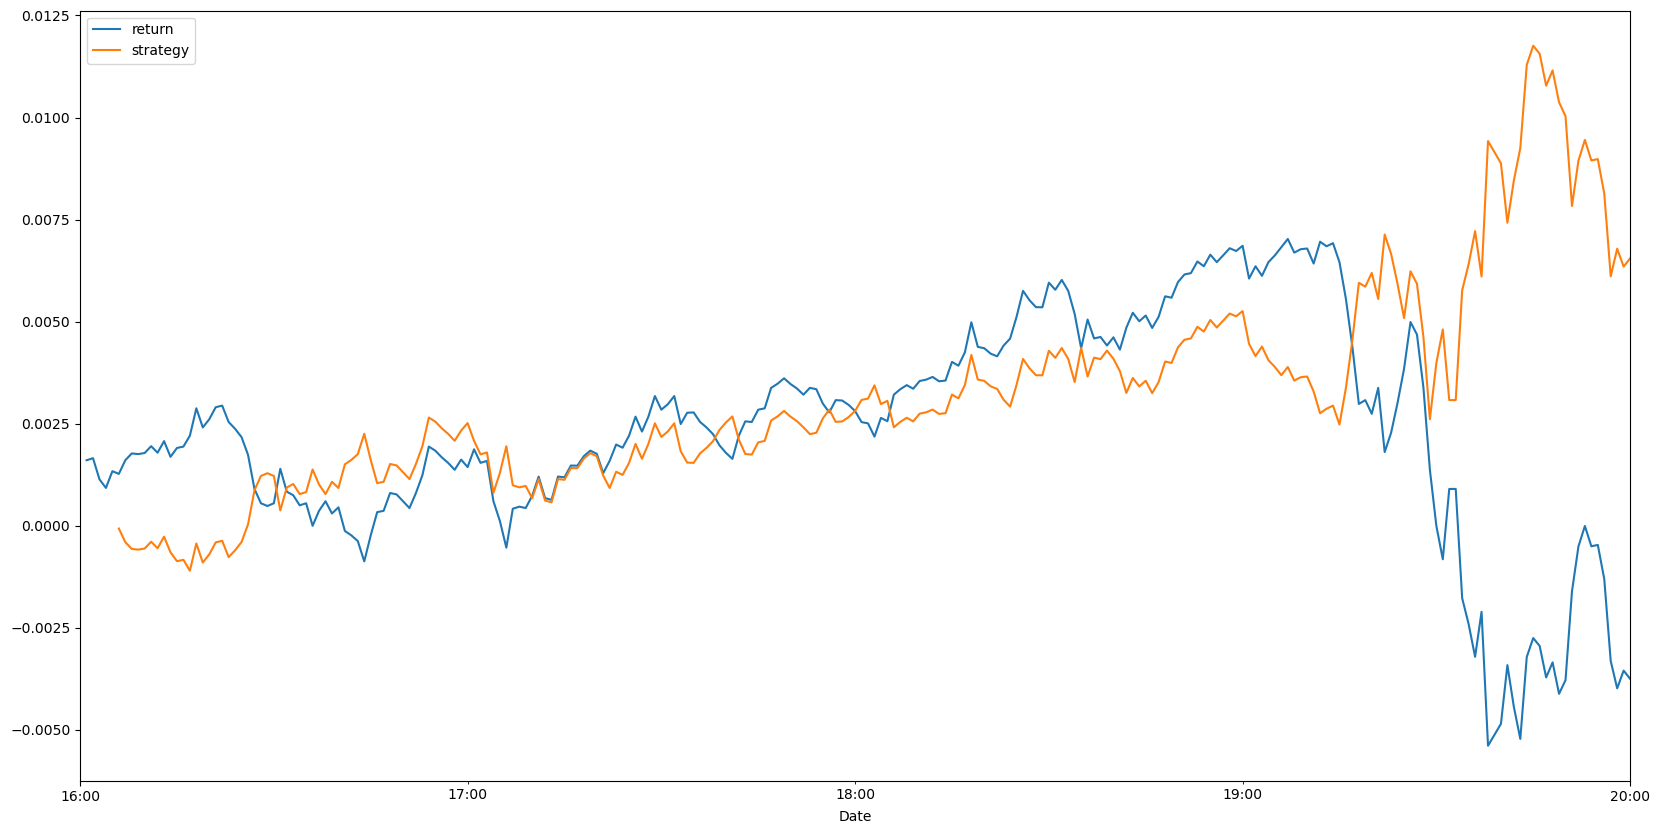

In [18]:
# 2. Intraday Momentum Strategies for 1 min, define "backtesting" function 
def backtesting(n): # n for rolling n days
    df = pd.read_csv('AAPL_1min.csv', parse_dates=['Date'], index_col=['Date'])
    df['return'] = np.log(df['CLOSE'] /df['CLOSE'].shift(1))
    df['position'] = np.sign(df['return'].rolling(n).mean())
    df['strategy'] = df['position'].shift(1) * df['return']
    df[['return','strategy']].cumsum().apply(np.exp).sub(1).plot(figsize=(20, 10))
    plt.show()
backtesting(5)

## LECTURE 4: 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
# 1. iterate over l1 and select the element i if greater(i) is true 
l1=[0,1,2,3,4,5,6,7,8,9]
def greater(x):
    return x>4.5
# method 1: for  ==> [5, 6, 7, 8, 9]
i=[i for i in l1 if greater(i)]
# method 2: filter, return column ==> [5, 6, 7, 8, 9]
f1=list(filter(greater,l1))
f2=list(filter(lambda x: x>4.5,l1))
# method 3*: map, return boolean ==> [False, False, False, False, False, True, True, True, True, True]
m1=list(map(greater,l1))
m2=list(map(lambda x: x>4.5,l1))

print("if greater: ", greater(4))
print(i)
print("filter: ", f1, f2)
print("map: ",m1, m2)

if greater:  False
[5, 6, 7, 8, 9]
filter:  [5, 6, 7, 8, 9] [5, 6, 7, 8, 9]
map:  [False, False, False, False, False, True, True, True, True, True] [False, False, False, False, False, True, True, True, True, True]


In [20]:
# 2.1 create dictionary for nest list
l4=[['AAPL',294],['MSFT',158],['GOOGL',1339],['INTC',60],['IBM',134]]
d0= {'AAPL':294,'MSFT':158,'GOOGL':1339,'INTC':60,'IBM':134}
d1= {}
d2= {}
d3= {}
# d1
for i in l4:
    d1[i[0]]=i[1]
# d2
d2={i[0]:i[1] for i in l4}
print(d0, d1, d2)

# 2.2 create dictionary for 2 list
l5=['AAPL', 'MSFT', 'GOOGL', 'INTC', 'IBM']
l6=[294,158,1339,60,134]
# method 1: for loop
for i in range(len(l5)):
    d3[l5[i]]=l6[i]
# method 2: zip
d4= {i:j for i,j in zip(l5,l6)} 

print(d3, d4)

{'AAPL': 294, 'MSFT': 158, 'GOOGL': 1339, 'INTC': 60, 'IBM': 134} {'AAPL': 294, 'MSFT': 158, 'GOOGL': 1339, 'INTC': 60, 'IBM': 134} {'AAPL': 294, 'MSFT': 158, 'GOOGL': 1339, 'INTC': 60, 'IBM': 134}
{'AAPL': 294, 'MSFT': 158, 'GOOGL': 1339, 'INTC': 60, 'IBM': 134} {'AAPL': 294, 'MSFT': 158, 'GOOGL': 1339, 'INTC': 60, 'IBM': 134}


In [21]:
# 3.compute Market Capital
p=[294,158,1339,60,134]
q=[4443265,7632139,299628,4350000,885637]
price=np.array(p)
share=np.array(q)
# way 1:tolist()
w1=(price*share).tolist()
# way2: for loop & append
w2 = []
for i in range(len(l6)):
    w2.append(p[i]*q[i])
w2
# way3: iteration with zip
w3 = [i*j for i,j in zip(p,q)]
# way4: map & lambda
w4 = list(map(lambda x,y:x*y, p, q) )
print(w1, w2, w3, w4)

[1306319910, 1205877962, 401201892, 261000000, 118675358] [1306319910, 1205877962, 401201892, 261000000, 118675358] [1306319910, 1205877962, 401201892, 261000000, 118675358] [1306319910, 1205877962, 401201892, 261000000, 118675358]


In [22]:
# Activity 4: 5 different methods to compute non-negative integers 
#             below 100 are either divisible by 2 or by 3, the answer is 67
a4=np.arange(100)
l9=list(range(100))
# method 1: |
m1 = len(a4[(a4%2==0) | (a4%3==0)])
# method 2: 貝氏定理
m2 = len(a4[a4%2==0])+len(a4[a4%3==0]) - len(a4[a4%6==0])
# method 3: lambda
m3 = len(list(filter(lambda x: (x%2==0) | (x%3==0),l9)))
# method 4: for loop
m4 = len([list for i in l9 if (i%2==0) | (i%3==0)])
# method 5: filter
m5 = len(list(filter(lambda x: (x%2==0) | (x%3==0),l9)))
# method 6: filter
l10=[]
for i in l9:
    if (i%2==0) or (i%3==0) :
        l10.append(i)
w6=len(l10)
print(m1, m2, m3, m4, m5, w6)

67 67 67 67 67 67


## LECTURE 5: 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
# create 3 multiple indexes: year, quarter, and month
df1 = yf.download('AAPL', start="2015-01-01",end="2021-01-01")
df1.to_csv("df1_l5.csv")
df1=pd.read_csv("df1_l5.csv",parse_dates=["Date"],index_col=["Date"])
df1['year']=df1.index.year
df1['quarter']=df1.index.quarter
df1['month']=df1.index.month
df1["year"].value_counts()
df1["quarter"].unique()
df1["month"].nunique()

[*********************100%***********************]  1 of 1 completed


12

In [24]:
# describe index 
df1.sort_values("Adj Close", ascending=False, inplace=False )[-10:]
df1.sort_values(["year","quarter","month"], ascending=False)
df1["Adj Close"].nlargest(10)

df2=df1.set_index(keys=["year","quarter","month"], inplace=False)
q1= df2.index.get_level_values(0)
q2= df2.index.get_level_values(1)
q3= df2.index.get_level_values(2)
q4= df2.index.get_level_values("year").value_counts()
q5= df2.index.get_level_values("quarter").value_counts()
q6= df2.index.get_level_values("month").value_counts()
print(q1, q2, q3, q4, q5, q6)

Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       ...
       2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
      dtype='int32', name='year', length=1511) Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype='int32', name='quarter', length=1511) Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='month', length=1511) year
2020    253
2015    252
2016    252
2019    252
2017    251
2018    251
Name: count, dtype: int64 quarter
3    382
4    381
2    380
1    368
Name: count, dtype: int64 month
8     133
10    133
3     131
6     129
5     127
7     127
12    125
4     124
11    123
1     122
9     122
2     115
Name: count, dtype: int64


In [25]:
# manipulate database: drop, reset, and sort
m1 = df2.drop("Open",axis="columns",inplace=False)
m2 = df2.droplevel(1,axis="index")
m3 = df2.droplevel([1,2],axis="index")
m4 = df2.reset_index(inplace=False)
m5 = df2.sort_index(ascending=[False,True,True], inplace=False)
print(m1, m2, m3, m4, m5)

                          High         Low       Close   Adj Close     Volume
year quarter month                                                           
2015 1       1       27.860001   26.837500   27.332500   24.373955  212818400
             1       27.162500   26.352501   26.562500   23.687309  257142000
             1       26.857500   26.157499   26.565001   23.689537  263188400
             1       27.049999   26.674999   26.937500   24.021713  160423600
             1       28.037500   27.174999   27.972500   24.944687  237458000
...                        ...         ...         ...         ...        ...
2020 4       12     133.460007  131.100006  131.970001  129.189499   54930100
             12     137.339996  133.509995  136.690002  133.810074  124486200
             12     138.789993  134.339996  134.869995  132.028412  121047300
             12     135.990005  133.399994  133.720001  130.902634   96452100
             12     134.740005  131.720001  132.690002  129.8943

In [26]:
# select specific rows
s1 = df2.loc[2015]
s2 = df2.loc[2015,"Adj Close"]
s3 = df2.loc[(2015,1,1),"Adj Close"]
s4 = df2.loc[(slice(None),slice(None),1),["Volume","Adj Close"]]
s5 = df2.loc[(2015,1,slice(1,3)),:]
s6 = df1[(df1["year"]==2015) & (df1["quarter"]==1)]["Adj Close"].sort_values(ascending=False)[:5]
s7 = df1.loc[(df1["year"]==2015) & (df1["quarter"]==1),"Adj Close"].sort_values(ascending=False)[:5]
s8 = df2.loc[(2015,1,slice(None)),"Adj Close"].sort_values(ascending=False)[:5]
print(s1, s2, s3, s4, "s5", s5, s6,"s7", s7, s8)

                    Open       High        Low      Close  Adj Close  \
quarter month                                                          
1       1      27.847500  27.860001  26.837500  27.332500  24.373955   
        1      27.072500  27.162500  26.352501  26.562500  23.687309   
        1      26.635000  26.857500  26.157499  26.565001  23.689537   
        1      26.799999  27.049999  26.674999  26.937500  24.021713   
        1      27.307501  28.037500  27.174999  27.972500  24.944687   
...                  ...        ...        ...        ...        ...   
4       12     27.250000  27.250000  26.987499  27.007500  24.494495   
        12     26.897499  26.922501  26.545000  26.705000  24.220142   
        12     26.740000  27.357500  26.715000  27.184999  24.655478   
        12     27.145000  27.174999  26.795000  26.830000  24.333511   
        12     26.752501  26.757500  26.205000  26.315001  23.866434   

                  Volume  
quarter month             
1       1

In [25]:
# data summary
d1 = df2.describe()
d2 = df2.groupby("year").describe()
d3 = df2.groupby("year").describe()["Adj Close"]
d4 = df2.groupby(["year","quarter"]).size()
d5 = df2.groupby(["year","quarter"]).mean()
d6 = df2.groupby(["year","quarter"]).mean().stack()
d7 = df2.groupby(["year","quarter"]).mean().stack().index
d8 = df2.groupby(["year","quarter"]).mean().stack().unstack()
d9 = df2.groupby(["year","quarter"]).mean().stack().unstack(level=[0,1])
d10 = df2.groupby(["year","quarter"]).mean().stack().unstack(level=["year","quarter"])
d11 = df2.groupby(["year","quarter"]).mean().stack().unstack(level=0).index

df2.index.rename(names=["quarter","prices"],inplace=True)
df3=df2.groupby(["year","quarter"]).mean().stack().unstack(level=["year","quarter"])
t = df3.transpose()
print(d1, d2, d3, d4, d5, d6, d7, d8,d9, d10,d11)
print(t)

ValueError: Length of names must match number of levels in MultiIndex.

## LECTURE 6: 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
# 0. data retrive
df = yf.download('AAPL', start="2020-01-01",end="2021-01-01")
df1=pd.read_csv("df1_l6.csv",parse_dates=["Date"],index_col=["Date"])
df1["return"]=df1["Adj Close"].pct_change()
df1["change1"]=df1["Close"]-df1["Open"]
df1["quarter1"]=df1.index.quarter

# 1. drop colomn(axis="columns"), row(axis="index"), & missing value
df1.drop(labels=["High", "Low"],axis="columns",inplace=True)
df1.drop("2020-01-02",axis="index",inplace=False)
df1.dropna(inplace=True)
df1.index
df1.info()

# log transformation 
df1["volume2"]=df1["Volume"].apply(np.log)

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-01-03 to 2020-12-31
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   Close      252 non-null    float64
 2   Adj Close  252 non-null    float64
 3   Volume     252 non-null    int64  
 4   return     252 non-null    float64
 5   change1    252 non-null    float64
 6   quarter1   252 non-null    int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 14.8 KB


In [28]:
# 2. change the type from float to integer, and from integer to float 
# nan is treated as float, so if column has nan values, its dtype is float
# error if not drop nan before converting dtype from float to integer 
df1["Volume"]=df1["Volume"].astype("int")
df1["Volume"]=df1["Volume"].astype("float")

# 3. change value: 
# way 1: return*10000
df1["return"].mul(10000).dropna().astype("int")
# way 2
df1["change2"]=np.where(df1["Close"]>df1["Open"],"increased","not increased")
# or df1["change3"]=np.where(df1["change1"]>0,"increased","not increased")
df1[df1["change2"]!=df1["change3"]]

KeyError: 'change3'

In [ ]:
# 4. Show in million and ignore float
# way 1: define million function
# divide a number by 1 million, extract the integer part, 
# save the integer as a string, and add the string to " million" 
def million(x):
    return str(int(x/1000000))+" million"
df1["volume3"]=df1["Volume"].apply(million)
# way 2: apply lambda function
df1["volume4"]=df1["Volume"].apply(lambda x: str(int(x/1000000))+" million" )

In [26]:
# 5.bin values into intervals
# way 1: replace
df1["quarter2"]=df1["quarter1"].replace({1:"q1",2:"q2",3:"q3",4:"q4"})
# method 2: pd.cut
df1["return1"]=pd.cut(df1["return"],5,labels=["very low","low","average","high","very high"])

df1["return1"].value_counts()
df1["return1"].value_counts().sort_index()
df1["return1"].value_counts().index
pd.cut(df1["return"],5).value_counts()
pd.cut(df1["return"],5).value_counts().sort_index()
pd.cut(df1["return"],5).value_counts().index

# find the values at the following quantiles 
l1=[0,0.2,0.4,0.6,0.8,1] # 6 cut for 5 intervals
l2=[]
for i in l1:
    l2.append(df1["return"].quantile(i))
[df1["return"].quantile(i) for i in l1]
# same as list(map(df1["return"].quantile,l1))

pd.cut(df1["return"],l2,5,labels=["very low","low","average","high","very high"],include_lowest=True).value_counts().sort_index()

KeyError: 'quarter1'

In [ ]:
# 6. return value
df1["return"].notnull().sum()  # number of non-missing values 
df1[df1["return"].isnull()]    # return a row if return2 is missing 

# change the data type to category / string 
df1["return"]=df1["return"].astype("category")  #   .astype("str")
df1.info()

# two-way frequency counts
pd.crosstab(df1["quarter2"],df1["return"],margins=True) # margins=True adds row and column subtotals
df1.groupby(["quarter2","return"]).size().unstack()

## HW 1 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
df1 = yf.download("GOOGL", start="2023-01-01",end="2023-02-01")
# df1=pd.read_csv("df1_hw1.csv",parse_dates=["Date"],index_col=["Date"])
# question 1
df1['Simple return'] = df1['Adj Close'].pct_change()
df1['Cum return'] = df1['Simple return'].add(1).cumprod().sub(1)
df1['Log return'] = np.log(df1['Simple return']+1)
print(df1)
# question 2
a=df1['Simple return'].mean()
b=df1['Cum return'].mean()*250
c=df1['Simple return'].std()
d=df1['Simple return'].std()*250**0.5
e=df1['Cum return'].var()
f=df1['Log return'].var()*250
print(a,b,c,d,e,f)
# question 3
l1 =["GOOGL", 'AMZN', 'WMT']
df2 = yf.download(l1, start="2023-01-01",end="2023-02-01")
# df2=pd.read_csv("df2_hw1.csv",parse_dates=["Date"],index_col=["Date"])
df3 = np.log(df2['Adj Close']-df2['Adj Close'].shift(1))
df3
# question 4
covariance_matrix = df3.cov()
Annual_covariance_matrix = df3.cov()*250
correlation_matrix = df3.corr()
print(covariance_matrix, Annual_covariance_matrix, correlation_matrix)
# question 5
w =np.array([0.3, 0.4, 0.3])
portfolio_daily_log_returns = np.dot(df3.mean(),w)
portfolio_var_daily_log_returns =np.dot(w.T, np.dot(df3.cov(), w))
annual_portfolio_var_daily_log_returns = np.dot(w.T, np.dot(df3.cov()*250, w))
print (portfolio_daily_log_returns, portfolio_var_daily_log_returns, annual_portfolio_var_daily_log_returns)

## HW 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
# 1
df1=pd.read_csv("gold.csv",parse_dates=["Date"],index_col=["Date"])
# 2
df1.dropna(inplace=True)
# 3
df2 = pd.DataFrame(data={'price': df1['GDX']})
# 4
df2['log return'] = np.log(df2['price']-df2['price'].shift(1))
# 5
df2['25-day'] = df2['price'].rolling(window=25).mean()
# 6
df2.dropna(inplace=True)
# 7
df2['distance'] = df2['price'] - df2['25-day']
# 8
df2['distance'].plot(figsize=(20,10 ))
plt.axhline(y=3.5, color='r')
plt.axhline(y=-3.5,color='r')
plt.axhline(y=0, color='r')
# 9
df2['position'] = np.where(df2['distance'] > 3.5, -1, np.nan)
df2['position'] = np.where(df2['distance'] < -3.5, 1, np.nan)
df2['position'] = np.where(df2['distance'] * df2['distance'].shift(1) < 0, 0, df2['position'])
df2['position'] = df2['position'].ffill()
# 10
df2['position'].value_counts()
df2['position'].plot(figsize=(20, 10))
plt.show()
# 11
df2['strategy'] = df2['position'].shift(1) * df2['return']
# 12
df2['return_cum'] = df2['return'].cumsum().apply(np.exp).sub(1)
df2['strategy_cum'] = df2['strategy'].cumsum().apply(np.exp).sub(1)
# 13
df2[['return_cum','strategy_cum']].plot(figsize=(20, 10))
plt.show()
# 14
df2.iloc[-1]
np.exp(df2['return'].sum())-1
np.exp(df2['strategy'].sum())-1

## HW 3

In [ ]:

# question 1
# 1.1
l1 = list(range(0,19,2))
# 1.2
a1 = (np.array(l1)**3).tolist()
# 1.3
l2=[]
for i in l1:
    l2.append(i**3)
# 1.4
m1=[i**3 for i in l1] 
# m1 = list(map(lambda x: x**3,l1))

print(a1, l2, m1)

In [ ]:
# question 2
# 2.1
l3 = list(range(0,20))
# 2.2
m1=[i**3 for i in l3 if i%2==0]
# 2.3
def even(x):
    return x%2==0
# 2.4
m2=[i**3 for i in l3 if even(i)]
# 2.5
m3=list(filter(even,l3))
# 2.6
def cube(x):
    return x**3
# 2.7
list(map(cube, filter(even,l3)))
# 2.8
list(map(lambda x: x**3, filter(lambda x: x%2==0, l3)))
     
print(l2, m1,m2,m3)

In [ ]:
# question 3
# 3.1
df1 = yf.download("GOOGL", start="2016-01-01",end="2021-01-01")
df1.to_csv("df1_hw3.csv")
# df1=pd.read_csv("df1_hw3.csv",parse_dates=["Date"],index_col=["Date"])
df1.drop(labels='Volume', axis='columns', inplace=True)
# 3.2
df1['year']=df1.index.year
df1['month']=df1.index.month
df1['day']=df1.index.day
# 3.3
df2 = df1.set_index(keys=["year","month","day"])
# 3.4
df2 = df2.sort_index(ascending=True, inplace=True)
# 3.5
df2.loc[(slice(None),slice(1,2,3),slice(1,15)),:]
# df2.loc[(slice(None),slice(None,3),slice(None,15)),:]
# 3.6
df2.loc[(slice(None),slice(1,2,3),slice(1,15)),:].index.get_level_values(2).value_counts().sort_index()
# 3.7 
df2.loc[(slice(None),slice(1,2,3),slice(1,15)),'Adj Close'].sort_values(ascending=False)[:3]
df2.loc[(slice(None),slice(1,2,3),slice(1,15)),'Adj Close'].nlargest(3)
# 3.8
df2.groupby(["year","month"]).median()

## HW 4

In [ ]:
df1=pd.read_csv("df1_hw4.csv",parse_dates=["Date"],index_col=["Date"])

## Lecture 7: Build Market Weight Index

[*********************100%***********************]  9 of 9 completed


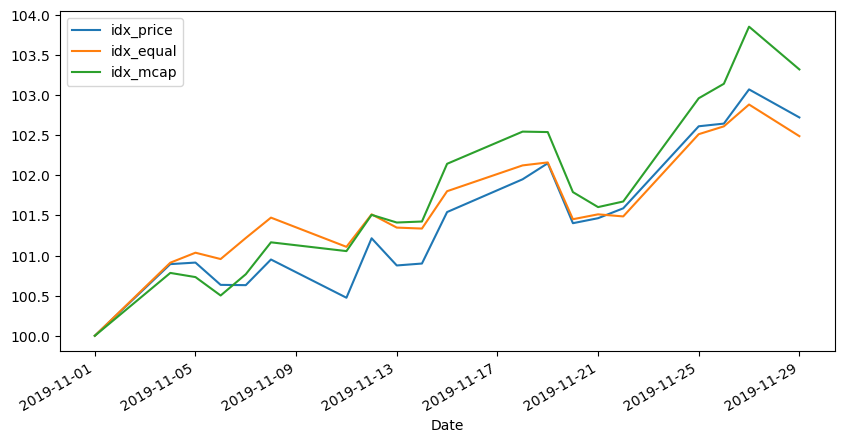

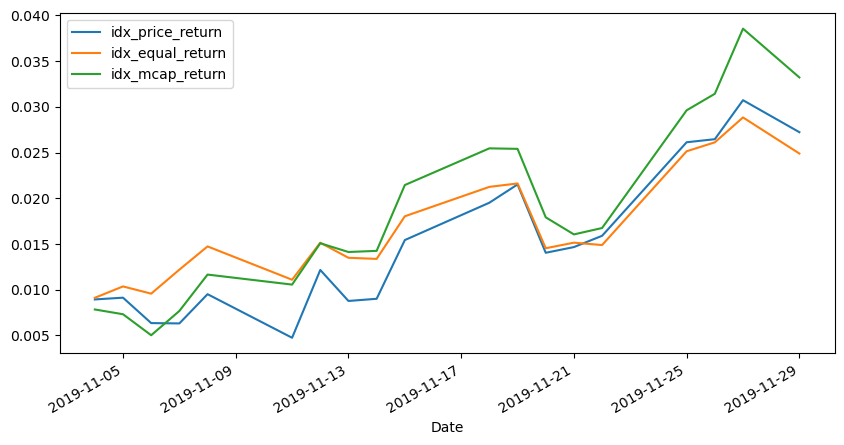

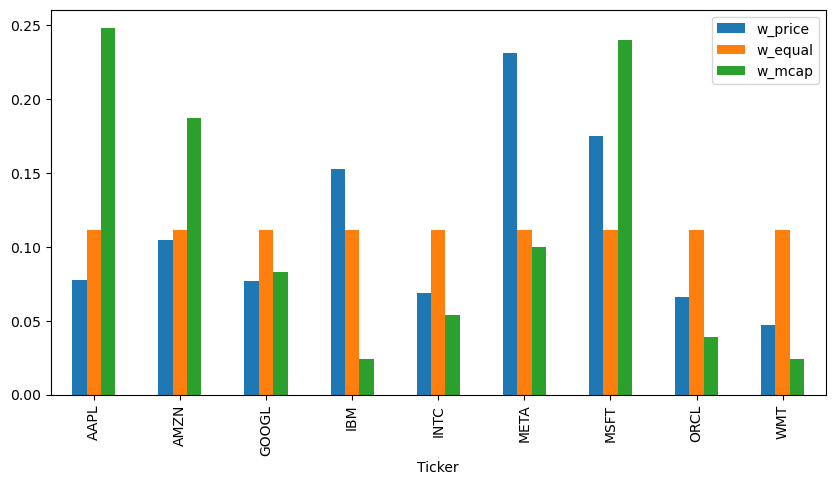

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Build equal weight market index
l1=['AAPL','AMZN','META','GOOGL','IBM','INTC','MSFT','ORCL','WMT']
df1 = yf.download(l1, start="2019-11-01",end="2019-12-01")["Close"].round(2)
idx_price_raw=df1.mean(axis = "columns")
ret=df1.pct_change()
a1=np.full(df1.shape,1/9) 

# build market cap-weighted market index
df2=pd.read_csv("shares.csv",parse_dates=["date"],index_col=["date"]).groupby("TICKER").first().div(1000).round(1) #.first()對每個TICKER選取第一個資料，也就是開盤日資料
mcap = df1.mul(df2["SHROUT"], axis = "columns")
sum_mcap=mcap.sum(axis="columns")

# Visualization 1: Different-weight index comparison
idx_price=idx_price_raw/idx_price_raw[0]*100
idx_equal=ret.mean(axis="columns").add(1).cumprod()*100 # equal weight
idx_equal[0]=100
idx_mcap=sum_mcap/sum_mcap[0]*100
index_value=pd.DataFrame(data={"idx_price":idx_price,"idx_equal":idx_equal,"idx_mcap":idx_mcap})
index_value.plot(figsize=(10,5));

# Visualization 1: Different-weight index return comparison
idx_price_return=idx_price[1:]/idx_price[0]-1
idx_equal_return=idx_equal[1:]/idx_equal[0]-1
idx_mcap_return=idx_mcap[1:]/idx_mcap[0]-1
index_return=pd.DataFrame(data={"idx_price_return":idx_price_return,"idx_equal_return":idx_equal_return,"idx_mcap_return":idx_mcap_return})
index_return.plot(figsize=(10,5));
sum_price=df1.sum(axis="columns")

# Visualization 2: stock weight comparison
w_price=df1.div(sum_price, axis = "index")  # average(equal weight) 
w_equal=pd.DataFrame(data=a1,index=df1.index,columns=df1.columns)
w_mcap=mcap.div(sum_mcap, axis = "index")
weight=pd.DataFrame(data={"w_price":w_price.mean(),"w_equal":w_equal.mean(),"w_mcap":w_mcap.mean()})
weight.plot(kind="bar",figsize=(10,5));

## Lecture 8: optimal portfolio management

[*********************100%***********************]  9 of 9 completed


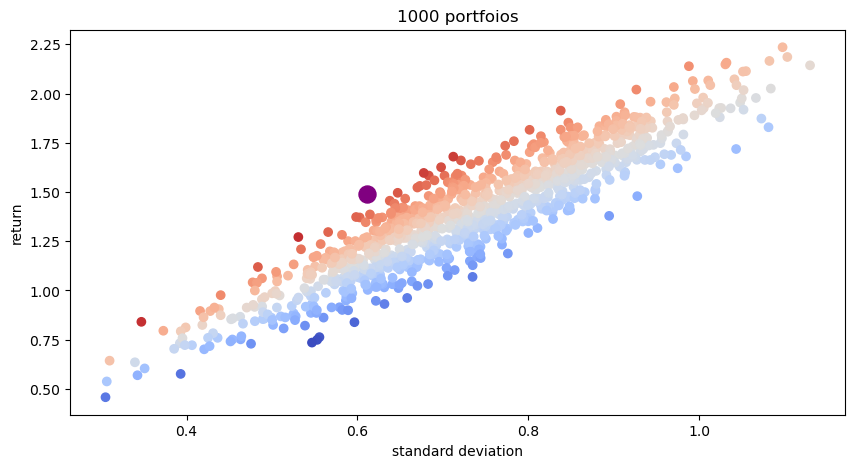

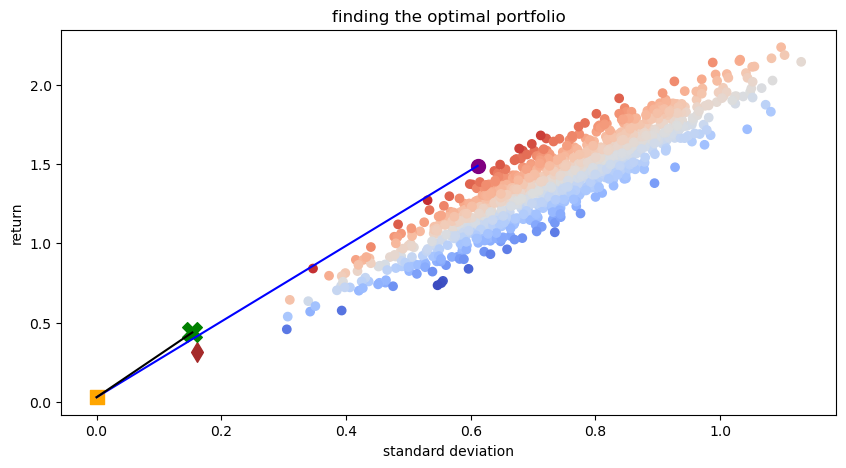

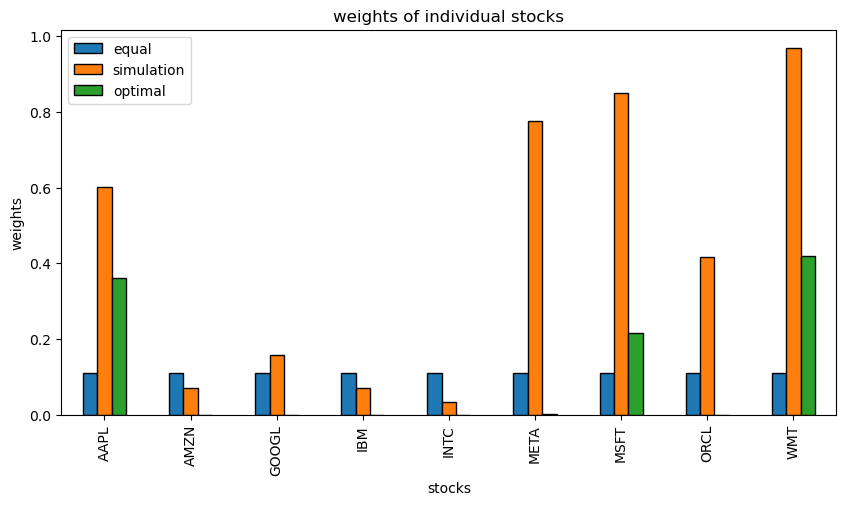

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
import matplotlib.pyplot as plt

l1=['AAPL','AMZN','META','GOOGL','IBM','INTC','MSFT','ORCL','WMT']
df1 = yf.download(l1, start="2019-01-01",end="2020-01-01")["Adj Close"]
df1.to_csv("df1_l8.csv")
df1=pd.read_csv("df1_l8.csv",parse_dates=["Date"],index_col=["Date"])

# Create equally-weighted portfolio (a1)
df2=np.log(df1/df1.shift(1)).dropna()
a1=np.array([1/9]*9)
def portfolio(a1):
    ret=np.dot(df2.mean(),a1)*250
    std=np.dot(a1.T, np.dot(df2.cov()*250, a1))**0.5
    sharpe=(ret-0.03)/std          # assume the annual risk-free interest rate is 0.03
    return ret,std,sharpe
portfolio(a1)
ret1,std1,sharpe1=portfolio(a1)

# Generate 1000 simulated portfolios (a2)
np.random.seed(0) 
a2=np.random.rand(1000,9)  # 1000*9 random numbers from a uniform distribution over [0, 1)
def portfolios(a2):
    df=pd.DataFrame(data={'ret':np.zeros(len(a2)),'std':np.zeros(len(a2)),'sharpe':np.zeros(len(a2))})
    for i in range(len(a2)):
        df.loc[i,'ret']=np.dot(df2.mean(),a2[i])*250
        df.loc[i,'std']=np.dot(a2[i].T, np.dot(df2.cov()*250, a2[i]))**0.5
        df.loc[i,'sharpe']=(df.loc[i,'ret']-0.03)/df.loc[i,'std']          
    return df
portfolios(a2)
df3=portfolios(a2)
ret2,std2,sharpe2=df3.iloc[667]

# Generate Optimal portfolio (a3)
def neg_sharpe(weight):
    ret=np.dot(df2.mean(),weight)*250
    std=np.dot(weight.T, np.dot(df2.cov()*250, weight))**0.5
    sharpe=(ret-0.03)/std       
    return -sharpe
def sum_weight(weight):
    return np.sum(weight)-1
constraint = ({'type':'eq','fun': sum_weight})
bound = ((0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1),(0,1))
optimal=minimize(fun=neg_sharpe, x0=a1, method = 'SLSQP', bounds = bound, constraints = constraint)
optimal
a3=optimal["x"]
ret3,std3,sharpe3=portfolio(a3)

# visualization 1: 1000 portfolios 
plt.figure(figsize = (10, 5))
plt.scatter(x=df3["std"],y=df3["ret"],c=df3["sharpe"], cmap= "coolwarm") #c: 顏色基於夏普比率，越高越紅，越低越藍
plt.scatter(x=std2,y=ret2,color="purple",s=150,marker="o") # 繪製一個紫色的點，大小是100，標準差與回報是std2跟ret2
plt.xlabel('standard deviation')
plt.ylabel('return')
plt.title('1000 portfoios');

# Visualization 2: finding the optimal portfolio of 1000 portfolios (purple dot)
plt.figure(figsize = (10, 5))
plt.scatter(x=df3["std"],y=df3["ret"],c=df3["sharpe"], cmap="coolwarm")
plt.scatter(x=std1,y=ret1,color="brown",s=100,marker="d")
plt.scatter(x=std2,y=ret2,color="purple",s=100,marker="o")
plt.scatter(x=std3,y=ret3,color="green",s=200, marker="X")
plt.scatter(x=0,y=0.03,color="orange",s=100, marker="s")
plt.plot([0,std2],[0.03,ret2],color="blue")
plt.plot([0,std3],[0.03,ret3],color="black")
plt.xlabel('standard deviation')
plt.ylabel('return')
plt.title('finding the optimal portfolio');

# Visualization 3: Stocks weight comparison
w1=pd.Series(data=a1,index=df2.columns)
w2=pd.Series(data=a2[667],index=df2.columns)
w3=pd.Series(data=a3,index=df2.columns).round(6)
weight=pd.DataFrame({"equal":w1,"simulation":w2,"optimal":w3})
weight.plot(kind="bar",figsize = (10,5), edgecolor='black')
plt.xlabel('stocks')
plt.ylabel('weights')
plt.title('weights of individual stocks');

## Lecture 9: Grouping 

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df1=pd.read_csv("newcrsp.csv" ,parse_dates=["psdate"])
df1["year"]=pd.DatetimeIndex(df1['psdate']).year

# iterate over the years and return the index position
# find the values of bm at the quantiles for each year
d1={}
d2={}
l=[0,0.2,0.4,0.6,0.8,1] # create 5 bins with an equal number of observations for each year 
for n,year in enumerate(np.unique(df1["year"])):
    d1[year]=[df1.loc[df1["year"]==year,"bm"].quantile(i) for i in l]
    d2[n]=pd.cut(df1.loc[df1["year"]==year,"bm"],d1[year],labels=[1,2,3,4,5],include_lowest=True) 
    
# combine bm_rank for all the years 
df1["bm_rank"]=pd.concat([d2[0],d2[1],d2[2],d2[3],d2[4],d2[5],d2[6],d2[7],d2[8]],axis="index")
df1["bm_rank"].value_counts()
df1.groupby("bm_rank")["bm"].mean()
stats.f_oneway(df1.loc[df1["bm_rank"]==1,"hpr5yr"],df1.loc[df1["bm_rank"]==2,"hpr5yr"],\
               df1.loc[df1["bm_rank"]==3,"hpr5yr"],df1.loc[df1["bm_rank"]==4,"hpr5yr"],\
               df1.loc[df1["bm_rank"]==5,"hpr5yr"]) 

,cusip,psdate,hpr5yr,price,eps,bm,mktval,year,bm_rank
0,00036110,1984-08-31,3.311923,22.625,0.97,0.597,135.908,1984,2
1,00036110,1985-08-30,0.378167,22.625,1.51,0.640,136.474,1985,3
2,00036110,1986-08-29,0.104652,23.500,1.27,0.446,213.827,1986,2
3,00036110,1987-08-31,-0.391107,37.375,1.50,0.342,392.400,1987,2
4,00036110,1988-08-31,-0.408846,24.625,1.34,0.385,390.429,1988,1
...,...,...,...,...,...,...,...,...,...
7927,98991310,1990-12-31,2.551726,4.125,0.50,0.777,21.891,1990,4
7928,98991710,1984-03-30,0.119937,12.250,0.59,1.657,13.316,1984,5
7929,M4113L11,1986-06-30,0.778464,13.625,0.88,0.542,23.490,1986,3
7930,M4113L11,1987-06-30,0.814253,10.250,1.06,0.802,17.671,1987,4


## Lecture 10

In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import yfinance as yf
l1=['AAPL','^GSPC']
df1= yf.download(l1, start="2017-12-29", end="2021-01-01")["Adj Close"]
df2=np.log(df1/df1.shift(1))*100
df2.dropna(inplace=True)
df2.index = df2.index.tz_localize(None)
df3=pd.read_csv("fama3factors.csv",parse_dates=["date"],index_col="date")
df4=pd.concat([df3,df2],axis="columns")

# OLS 1: 蘋果股票與標普500回報的線性關係
print(sm.OLS(df4['AAPL'], sm.add_constant(df4['^GSPC'])).fit().summary())
# OLS 2: 蘋果股票是否遵循 CAPM，資產定價模型的驗證
df4["AAPL_RF"]=df4["AAPL"]-df4["RF"]
df4["^GSPC_RF"]=df4["^GSPC"]-df4["RF"]
print(sm.OLS(df4['AAPL_RF'], sm.add_constant(df4['^GSPC_RF'])).fit().summary())
# OLS 3: 蘋果與整體市場回報的關聯
print(sm.OLS(df4['AAPL_RF'], sm.add_constant(df4["Mkt_RF"])).fit().summary())
# MLS : 蘋果的三因子模型 3-factors model
x=df4[["Mkt_RF","SMB","HML"]]
print(sm.OLS(df4['AAPL_RF'], sm.add_constant(x)).fit().summary())
# Logit 
df5=pd.read_csv("hwfailed.csv")
x_log=df5[["tdta","gempl","opita","invsls","lsls"]]
print(sm.Logit(df5['yd'], sm.add_constant(x_log)).fit().summary())

[*********************100%***********************]  2 of 2 completed

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     1276.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          2.53e-164
Time:                        16:16:21   Log-Likelihood:                -1298.7
No. Observations:                 756   AIC:                             2601.
Df Residuals:                     754   BIC:                             2611.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1029      0.049      2.094      0.0

## Lecture 11: Time Series Analysis

1. ADF Test Statistic: -3.172122713830788
2. p-value: 0.021656103523732942
3. Number of lags used: 0
4. Number of observations used: 35
5. Critical values: {'1%': -3.6327426647230316, '5%': -2.9485102040816327, '10%': -2.6130173469387756}
6. Information Criteria Best: 333.6120475010905


,lb_stat,lb_pvalue
6,3.057456,0.801602
12,7.449109,0.826565


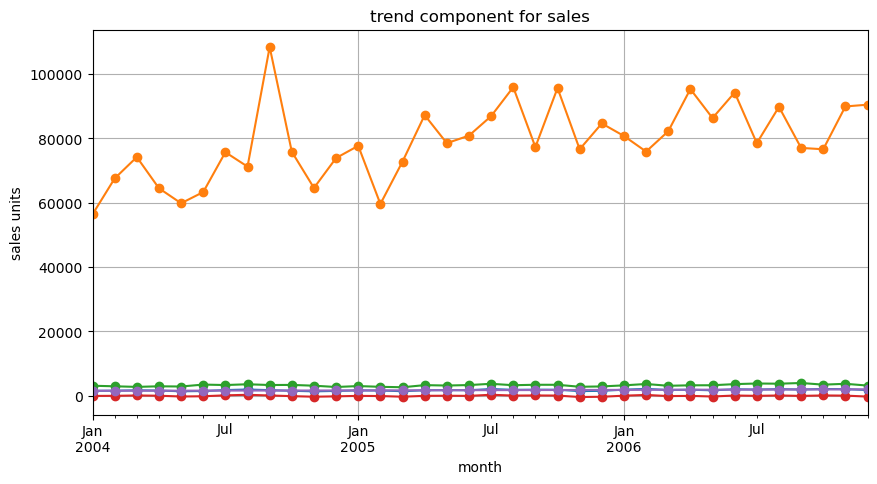

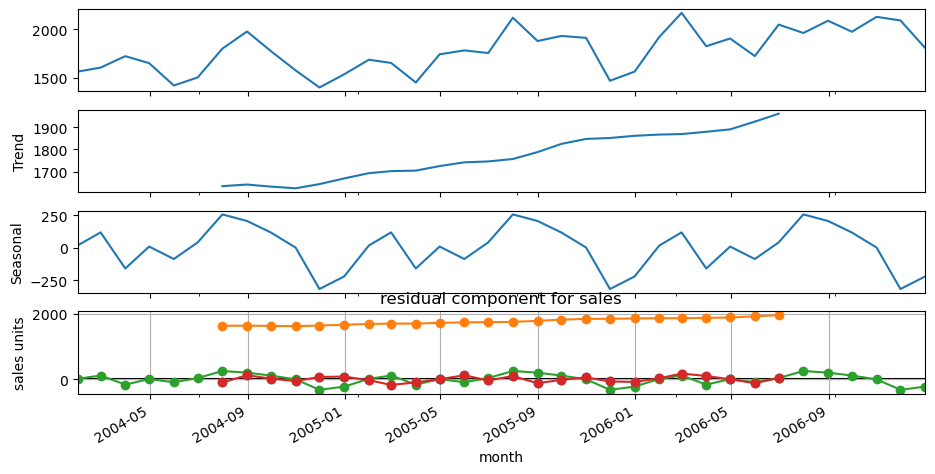

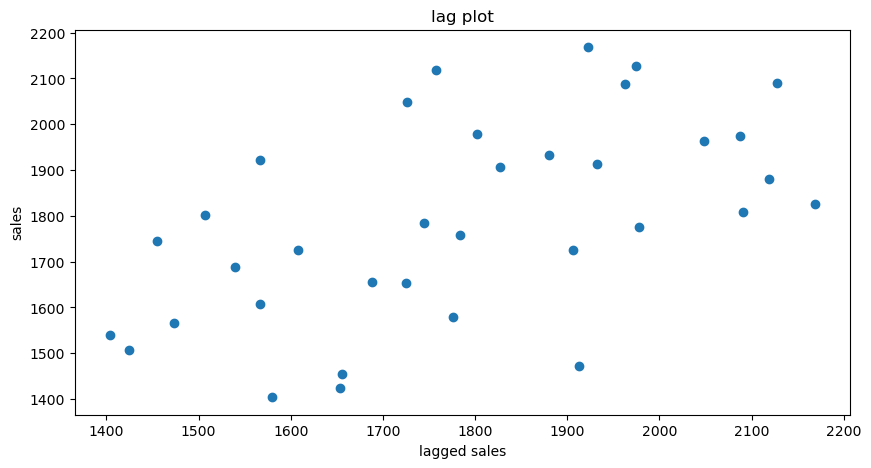

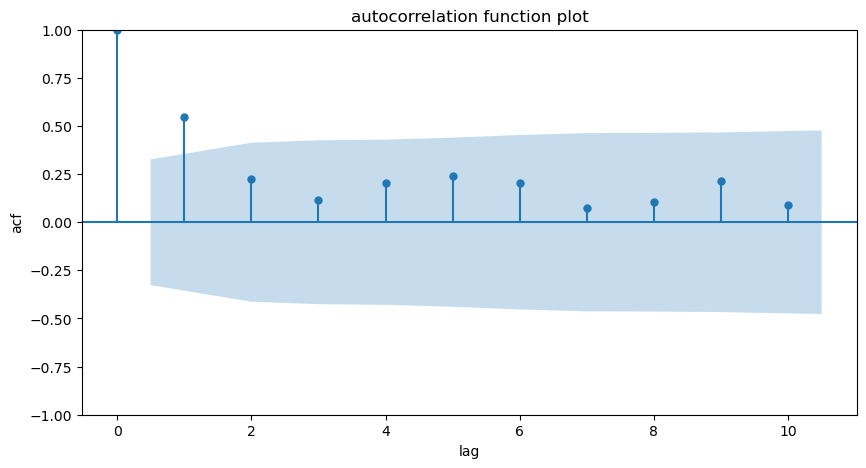

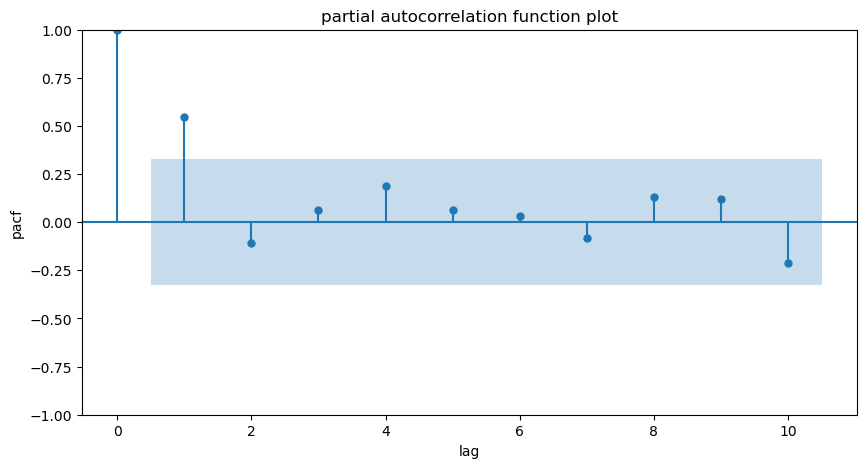

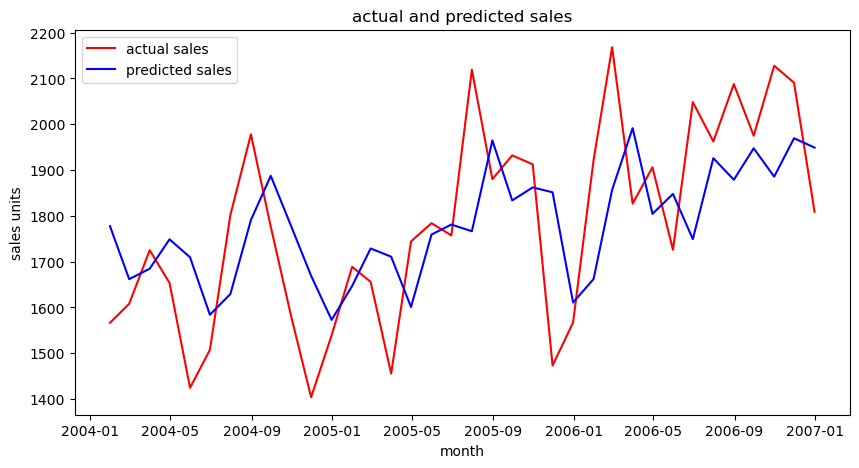

In [20]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller  
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

df1=pd.read_csv("transactions.csv",parse_dates=["date"],date_format="%d%b%Y")
dt.datetime.strptime("2004-01-02", "%Y-%m-%d")
dt.datetime.strptime("01/02/2004", "%m/%d/%Y")
dt.datetime.strptime("02JAN2004:08:00:00","%d%b%Y:%H:%M:%S")

# transactional data 
df1.dropna().plot(kind="scatter", x="date",y="units", figsize=(10,5))
plt.xlabel('date')
plt.ylabel('sales units')
plt.title('transactional data plot');

# resample 1: .mean(), average
df1["dtdate"]=df1["dtdate"].apply(lambda x: dt.datetime.strptime(x,"%d%b%Y:%H:%M:%S"))
df1.set_index("date",inplace=True)
df1["units"].resample("ME").mean().plot(figsize=(10,5),marker="o",grid=True)
plt.xlabel('month')
plt.ylabel('sales units')
plt.title('average sales per month');
# resample 2: .sum(), total
df1["units"].resample("ME").sum().plot(figsize=(10,5),marker="o",grid=True)
plt.xlabel('month')
plt.ylabel('sales units')
plt.title('total sales per month');
# resample 3: .max(), maximum
df1["units"].resample("ME").max().plot(figsize=(10,5),marker="o",grid=True)
plt.xlabel('month')
plt.ylabel('sales units')
plt.title('maximum sales per month');

# HP filter 1: [0], cyclical component
df2=df1["units"].resample("ME").mean().to_frame()
sm.tsa.filters.hpfilter(df2["units"])[0].plot(figsize=(10,5),marker="o",grid=True)
plt.xlabel('month')
plt.ylabel('sales units')
plt.title('cyclical component for sales');
# HP filter 2: [1], trend component
sm.tsa.filters.hpfilter(df2["units"])[1].plot(figsize=(10,5),marker="o",grid=True)
plt.xlabel('month')
plt.ylabel('sales units')
plt.title('trend component for sales');

# seasonal 1: comp.plot(), summary
comp= seasonal_decompose(df2,period=12)
comp.plot();
# seasonal 2: comp.trend.plot, trend component
comp.trend.plot(figsize=(10,5),marker="o",grid=True)
plt.xlabel('month')
plt.ylabel('sales units')
plt.title('trend component for sales');
# seasonal 3: comp.seasonal.plot, seasonal component
comp.seasonal.plot(figsize=(10,5),marker="o",grid=True)
plt.xlabel('month')
plt.ylabel('sales units')
plt.title('seasonal component for sales');
# seasonal 4: comp.resid.plot, residual components (line plot)
comp.resid.plot(figsize=(10,5),marker="o",grid=True)
plt.xlabel('month')
plt.ylabel('sales units')
plt.title('residual component for sales');

# Stationary & ADF 
adfuller(df2)
print("1. ADF Test Statistic:", adfuller(df2)[0])
print("2. p-value:", adfuller(df2)[1])
print("3. Number of lags used:", adfuller(df2)[2])
print("4. Number of observations used:", adfuller(df2)[3])
print("5. Critical values:", adfuller(df2)[4])
print("6. Information Criteria Best:", adfuller(df2)[5])

# Autoregressive 1: lag_plot, scatter Plot
fig, ax = plt.subplots(figsize=(10,5))
lag_plot(df2, ax=ax)
ax.set_xlabel('lagged sales')
ax.set_ylabel('sales')
ax.set_title('lag plot');
# Autocorrelation 2: plot_acf, ACF function Plot
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(df2, lags=10, ax=ax)
ax.set_xlabel('lag')
ax.set_ylabel('acf')
ax.set_title('autocorrelation function plot');
# Autocorrelation 3: plot_pacf, partial autocorrelation function plot 
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(df2, lags=10, ax=ax)
ax.set_xlabel('lag')
ax.set_ylabel('pacf')
ax.set_title('partial autocorrelation function plot');

# ARIMA
arma=ARIMA(df2, order=(1,0,0)).fit() #(自回歸 ar, 差分, 移動平均ma)
arma.summary()
arma.params
arma.predict()
arma.predict(start=1,end=40)
arma.resid
# ARIMA visualization 
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(df2, 'red', arma.predict(), 'blue')
ax.set_xlabel('month')
ax.set_ylabel('sales units')
ax.set_title('actual and predicted sales')
plt.legend(["actual sales","predicted sales"]);

# Ljung–Box test of autocorrelation in residuals, reject = 顯著自相關
sm.stats.acorr_ljungbox(arma.resid, lags=[6,12], return_df=True)


## Lecture 12: Neural Nets

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary
from sklearn.model_selection import GridSearchCV

accidents_df = pd.read_csv('accidentsnn.csv')







